**Fashion MNIST MLP implementation from scratch**



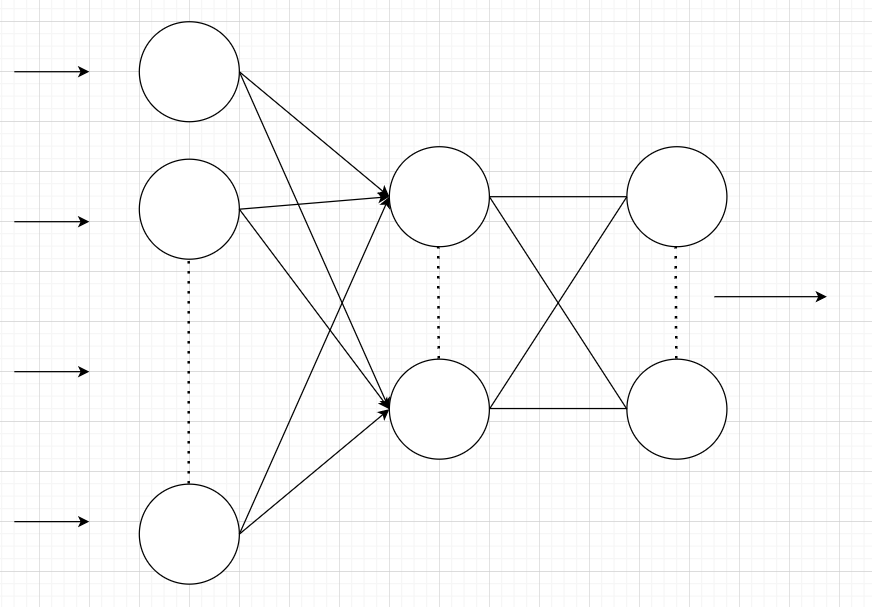

**Network Architecture:**

Input layer: 784 neurons

*   784 neurons
*   sigmoid/ ReLU activation


Hidden layer(x1):

*   10/20 neurons
*   sigmoid/ ReLU activation


Output layer:

*   10 neurons
*   softmax activation

**Hyperparameter selection**
1. ReLU activation function
*   learning rate = 0.5
*   epochs = 1000


2. Sigmoid activation function
*   learning rate = 0.75
*   epochs = 1000

# Modules imported

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
from math import log
import random
import pickle

# Data loading from Google drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# path_train = "/content/drive/MyDrive/Datasets/MNIST/fashion-mnist_train.csv"
path_train = "Datasets/MNIST/fashion-mnist_train.csv"
train_data = pd.read_csv(path_train)
np.shape(train_data)

(60000, 785)

In [ ]:
#path_test = "/content/drive/MyDrive/Datasets/MNIST/fashion-mnist_test.csv"
path_test = "Datasets/MNIST/fashion-mnist_test.csv"
test_data = pd.read_csv(path_test)
np.shape(test_data)

(10000, 785)

# Data visualization

In [ ]:
vis_train_labels = np.array(train_data.loc[:,'label'])
vis_train_data = np.array(train_data.loc[:,train_data.columns!='label'])

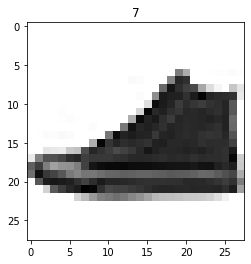

In [ ]:
object = random.randint(0, 59999)
plt.title((vis_train_labels[object]))
plt.imshow(vis_train_data[object].reshape(28,28), cmap=cm.binary)

In [ ]:
vis_test_labels = np.array(test_data.loc[:,'label'])
vis_test_data = np.array(test_data.loc[:,test_data.columns!='label'])

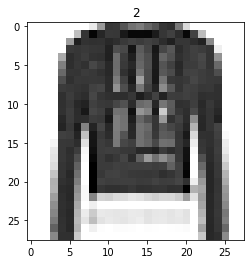

In [ ]:
object = random.randint(0, 9999)
plt.title((vis_test_labels[object]))
plt.imshow(vis_test_data[object].reshape(28,28), cmap=cm.binary)

# Data preprocessing

In [ ]:
def prepare_train_data(train_data):
  train_data = np.array(train_data)
  m,n = np.shape(train_data)
  np.random.seed(10)  
  np.random.shuffle(train_data)
  print(train_data.shape)
  train_data = train_data[0:m].T
  Y_train = train_data[0]
  X_train = train_data[1:n]
  X_train = X_train / 255.
  _,m_train = X_train.shape
  return (Y_train, X_train)

Y_train, X_train = prepare_train_data(train_data)

(60000, 785)


In [ ]:
def prepare_test_data(test_data):
  test_data = np.array(test_data)
  print(test_data.shape)  
  m,n = np.shape(test_data)
  #np.random.shuffle(test_data)
  test_data = test_data[0:m].T
  Y_test = test_data[0]
  X_test = test_data[1:n]
  X_test = X_test / 255.
  _,m_test = X_test.shape
  return (Y_test, X_test)

Y_test, X_test = prepare_test_data(test_data)

(10000, 785)


## Activation functions

In [ ]:
def Sigmoid(Z):
    return 1.0 / (1.0 + np.exp(-Z))
def Sigmoid_deriv(Z):
  return Sigmoid(Z) * (1- Sigmoid(Z))
def ReLU(Z):
    return np.maximum(Z, 0)
def ReLU_deriv(Z):
    return Z > 0
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

## Forward propogation

In [ ]:
def forward_prop_Sigmoid(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = Sigmoid(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [ ]:
def forward_prop_ReLU(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

## Backward propogation

In [ ]:
def backward_prop_Sigmoid(Z1, A1, Z2, A2, W1, W2, X, Y, Ymax):
    m, n = np.shape(train_data)
    one_hot_encoder_Y = one_hot_encoder(Y, Ymax)
    dZ2 = A2 - one_hot_encoder_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * Sigmoid_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [ ]:
def backward_prop_ReLU(Z1, A1, Z2, A2, W1, W2, X, Y, Ymax):
    m, n = np.shape(train_data)
    one_hot_encoder_Y = one_hot_encoder(Y, Ymax)
    dZ2 = A2 - one_hot_encoder_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

## Helper functions

In [ ]:
def one_hot_encoder(Y, Ymax):
    one_hot_encoder_Y = np.zeros((Y.size, Ymax + 1))
    one_hot_encoder_Y[np.arange(Y.size), Y] = 1
    one_hot_encoder_Y = one_hot_encoder_Y.T
    return one_hot_encoder_Y

In [ ]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1    
    W2 = W2 - learning_rate * dW2  
    b2 = b2 - learning_rate * db2    
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [ ]:
def make_predictions(X, W1, b1, W2, b2,Activation):
    if Activation == 1:
        _, _, _, A2 = forward_prop_Sigmoid(W1, b1, W2, b2, X)
    else:
        _, _, _, A2 = forward_prop_ReLU(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [ ]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [ ]:
def get_loss(predictions, Y):
    predictions = np.add(predictions, [1 for x in predictions])
    Y = np.add(Y, [1 for x in range(Y.size)])
    predictions = np.multiply(predictions, [0.1 for x in predictions])
    Y = np.multiply(Y, [0.1 for x in range(Y.size)])
    loss = abs(-sum([Y[i]*log(predictions[i]) for i in range(Y.size)]))
    return loss/len(Y)

## Weight and Bias initialization

In [ ]:
def init_params_zeros(L1):
    W1 = np.array([[0 for i in range(784)] for x in range(L1)])
    b1 = np.random.rand(L1, 1) - 0.5
    W2 = np.array([[0 for i in range(L1)] for x in range(10)])
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [ ]:
def init_params_random_normal(L1):
    np.random.seed(100)
    W1 = np.random.rand(L1, 784) - 0.5
    b1 = np.random.rand(L1, 1) - 0.5
    W2 = np.random.rand(L1, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# Different Optimization Techniques

In [ ]:
def initialize_momentum(W1, b1, W2, b2):
    vdW1 = np.zeros_like(W1)
    vdb1 = np.zeros_like(b1)                                                   
    vdW2 = np.zeros_like(W2)
    vdb2 = np.zeros_like(b2)
    return vdW1, vdb1, vdW2, vdb2            

In [ ]:
def update_parameters_with_momentum(W1, b1, W2, b2, dW1, db1, dW2, db2,vdW1, vdb1, vdW2, vdb2, beta, learning_rate):
    # compute velocities
    vdW1 = beta*vdW1 + (1 - beta)*dW1
    vdb1 = beta*vdb1 + (1 - beta)*db1
    vdW2 = beta*vdW2 + (1 - beta)*dW2
    vdb2 = beta*vdb2 + (1 - beta)*db2
    # update parameters
    W1 = W1 - learning_rate*vdW1
    b1 = b1 - learning_rate*vdb1
    W2 = W2 - learning_rate*vdW2
    b2 = b2 - learning_rate*vdb2
    return W1, b1, W2, b2,vdW1, vdb1, vdW2, vdb2

In [ ]:
def upgrade_parameters_with_NAG(Xtrain, Ytrain, W1, b1, W2, b2, dW1, db1, dW2, db2,vdW1, vdb1, vdW2, vdb2 , beta, learning_rate, Activation, Ymax):
    W1i = W1 + beta*vdW1 
    b1i = b1 + beta*vdb1
    W2i = W2 + beta*vdW2 
    b2i = b2 + beta*vdb2
    if Activation == 1:
        Z1, A1, Z2, A2 = forward_prop_Sigmoid(W1i, b1i, W2i, b2i, Xtrain)
        dW1i, db1i, dW2i, db2i = backward_prop_Sigmoid(Z1, A1, Z2, A2, W1i, W2i, Xtrain, Ytrain, Ymax)
    else:
        Z1, A1, Z2, A2 = forward_prop_ReLU(W1, b1, W2, b2, Xtrain)
        dW1i, db1i, dW2i, db2i = backward_prop_ReLU(Z1, A1, Z2, A2, W1i, W2i, Xtrain, Ytrain, Ymax)
    
    vdW1 = beta*vdW1 + (1 - beta)*dW1i
    vdb1 = beta*vdb1 + (1 - beta)*db1i
    vdW2 = beta*vdW2 + (1 - beta)*dW2i
    vdb2 = beta*vdb2 + (1 - beta)*db2i
    # update parameters
    W1 = W1 - learning_rate*vdW1
    b1 = b1 - learning_rate*vdb1
    W2 = W2 - learning_rate*vdW2
    b2 = b2 - learning_rate*vdb2
    return W1, b1, W2, b2, vdW1, vdb1, vdW2, vdb2

In [ ]:
def initialize_adagrad(W1, b1, W2, b2):
    GW1 = np.zeros_like(W1)
    Gb1 = np.zeros_like(b1)                                                   
    GW2 = np.zeros_like(W2)
    Gb2 = np.zeros_like(b2)
    return GW1, Gb1, GW2, Gb2  

In [ ]:
def update_parameters_with_adagrad(W1, b1, W2, b2, dW1, db1, dW2, db2, GW1, Gb1, GW2, Gb2, beta, learning_rate, epsilon):
    # update parameters
    GW1 = GW1 + np.square(dW1)
    Gb1 = Gb1 + np.square(db1)
    GW2 = GW2 + np.square(dW2)
    Gb2 = Gb2 + np.square(db2)
    W1 = W1 - learning_rate*dW1/np.sqrt(GW1 + epsilon)
    b1 = b1 - learning_rate*db1/np.sqrt(Gb1 + epsilon)
    W2 = W2 - learning_rate*dW2/np.sqrt(GW2 + epsilon)
    b2 = b2 - learning_rate*db2/np.sqrt(Gb2 + epsilon)
    return W1, b1, W2, b2, GW1, Gb1, GW2, Gb2


In [ ]:
def initialize_RMSprop(W1, b1, W2, b2):
    EW1 = np.zeros_like(W1)
    Eb1 = np.zeros_like(b1)                                                   
    EW2 = np.zeros_like(W2)
    Eb2 = np.zeros_like(b2)
    return EW1, Eb1, EW2, Eb2  

In [ ]:
def update_parameters_with_RMSprop(W1, b1, W2, b2, dW1, db1, dW2, db2, EW1, Eb1, EW2, Eb2, beta, learning_rate, epsilon):
    # update parameters
    
    EW1 = beta*EW1 + (1-beta)*np.square(dW1)
    Eb1 = beta*Eb1 + (1-beta)*np.square(db1)
    EW2 = beta*EW2 + (1-beta)*np.square(dW2)
    Eb2 = beta*Eb2 + (1-beta)*np.square(db2)
    W1 = W1 - learning_rate*dW1/np.sqrt(EW1 + epsilon)
    b1 = b1 - learning_rate*db1/np.sqrt(Eb1 + epsilon)
    W2 = W2 - learning_rate*dW2/np.sqrt(EW2 + epsilon)
    b2 = b2 - learning_rate*db2/np.sqrt(Eb2 + epsilon)
    return W1, b1, W2, b2, EW1, Eb1, EW2, Eb2

In [ ]:
def initialize_adam(W1, b1, W2, b2) :
    vdW1 = np.zeros_like(W1)
    vdb1 = np.zeros_like(b1)                                                   
    vdW2 = np.zeros_like(W2)
    vdb2 = np.zeros_like(b2)
    sdW1 = np.zeros_like(W1)
    sdb1 = np.zeros_like(b1)
    sdW2 = np.zeros_like(W2)
    sdb2 = np.zeros_like(b2)
    return vdW1, vdb1, vdW2, vdb2 , sdW1, sdb1, sdW2, sdb2 

In [ ]:
def update_parameters_with_adam(W1, b1, W2, b2, dW1, db1, dW2, db2, vdW1, vdb1, vdW2, vdb2 ,sdW1, sdb1, sdW2, sdb2, t, learning_rate, beta = 0.9,        
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    # compute velocities
    vdW1 = beta*vdW1 + (1 - beta)*dW1
    vdb1 = beta*vdb1 + (1 - beta)*db1
    vdW2 = beta*vdW2 + (1 - beta)*dW2
    vdb2 = beta*vdb2 + (1 - beta)*db2

    # Compute bias-corrected first moment estimate. 
    vdW1_corrected= vdW1/(1 - beta1**t)
    vdb1_corrected = vdb1/(1 - beta1**t)
    vdW2_corrected= vdW2/(1 - beta1**t)
    vdb2_corrected = vdb2/(1 - beta1**t)
    
    # Moving average of the squared gradients. 
    sdW1 = beta2*sdW1 + (1 - beta2)*np.square(dW1)
    sdb1 = beta2*sdb1 + (1 - beta2)*np.square(db1)
    sdW2 = beta2*sdW2 + (1 - beta2)*np.square(dW2)
    sdb2 = beta2*sdb2 + (1 - beta2)*np.square(db2)
        
    # Compute bias-corrected second raw moment estimate. 
    sdW1_corrected= sdW1/(1 - beta2**t)
    sdb1_corrected = sdb1/(1 - beta2**t)
    sdW2_corrected= sdW2/(1 - beta2**t)
    sdb2_corrected = sdb2/(1 - beta2**t)    
        
    # Update parameters. 
    W1 = W1 -learning_rate*vdW1_corrected/(np.sqrt(sdW1_corrected)+ epsilon)  
    b1 = b1 -learning_rate*vdb1_corrected/(np.sqrt(sdb1_corrected)+ epsilon)     
    W2 = W2 -learning_rate*vdW2_corrected/(np.sqrt(sdW2_corrected)+ epsilon)  
    b2 = b2 -learning_rate*vdb2_corrected/(np.sqrt(sdb2_corrected)+ epsilon)      
    return W1, b1, W2, b2, vdW1, vdb1, vdW2, vdb2 ,sdW1, sdb1, sdW2, sdb2

In [ ]:
def model(Xtrain, Ytrain, Xtest, Ytest, L1, Activation,Initial, Algorithm, Optimizer, learning_rate, beta, beta1, beta2, epochs, epsilon):
    print("Training model_",L1, Activation, Initial, Algorithm, Optimizer)
    Ymax = np.max(Y_train)
    training_accuracy = []
    validation_accuracy = []
    training_loss = []
    validation_loss = []
    if Initial == 1:
        W1, b1, W2, b2 = init_params_zeros(L1)
    else:
        W1, b1, W2, b2 = init_params_random_normal(L1)
    # Initialize the optimizer
    if Optimizer == "momentum" or Optimizer == "NAG":
        vdW1, vdb1, vdW2, vdb2 = initialize_momentum(W1, b1, W2, b2)
    elif Optimizer == "adagrad":
        GW1, Gb1, GW2, Gb2 = initialize_adagrad(W1, b1, W2, b2)
    elif Optimizer == "RMSprop":
        EW1, Eb1, EW2, Eb2 = initialize_RMSprop(W1, b1, W2, b2)
    elif Optimizer == "adam":
        t = 0
        vdW1, vdb1, vdW2, vdb2, sdW1, sdb1, sdW2, sdb2 = initialize_adam(W1, b1, W2, b2)    
        
    for i in range(epochs+1):
        if Algorithm == "SGD":
            for j in range(X_train.shape[1]):
                if Activation == 1:
                    Z1, A1, Z2, A2 = forward_prop_Sigmoid(W1, b1, W2, b2, Xtrain[:,j].reshape(1,-1).T)
                    dW1, db1, dW2, db2 = backward_prop_Sigmoid(Z1, A1, Z2, A2, W1, W2, Xtrain[:,j].reshape(1,-1).T, Ytrain[j],Ymax)
                else:
                    Z1, A1, Z2, A2 = forward_prop_ReLU(W1, b1, W2, b2, Xtrain[:,j].reshape(1,-1).T)
                    dW1, db1, dW2, db2 = backward_prop_ReLU(Z1, A1, Z2, A2, W1, W2, Xtrain[:,j].reshape(1,-1).T, Ytrain[j],Ymax)
                if Optimizer == "SGD":
                    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
                elif  Optimizer == "momentum":
                    W1, b1, W2, b2, vdW1, vdb1, vdW2, vdb2 = update_parameters_with_momentum(W1, b1, W2, b2, dW1, db1, dW2, db2,vdW1, vdb1, vdW2, vdb2 , beta, learning_rate)
                elif  Optimizer == "NAG":
                    W1, b1, W2, b2, vdW1, vdb1, vdW2, vdb2 = upgrade_parameters_with_NAG(Xtrain, Ytrain, W1, b1, W2, b2, dW1, db1, dW2, db2,vdW1, vdb1, vdW2, vdb2 , beta, learning_rate, Activation, Ymax)
                elif  Optimizer == "adagrad":
                    W1, b1, W2, b2, GW1, Gb1, GW2, Gb2 = update_parameters_with_adagrad(W1, b1, W2, b2, dW1, db1, dW2, db2, GW1, Gb1, GW2, Gb2, beta, learning_rate, epsilon)
                elif  Optimizer == "RMSprop":
                    W1, b1, W2, b2, EW1, Eb1, EW2, Eb2 = update_parameters_with_RMSprop(W1, b1, W2, b2, dW1, db1, dW2, db2, EW1, Eb1, EW2, Eb2, beta, learning_rate, epsilon)
                elif Optimizer == "adam":
                    t = t + 1 # Adam counter
                    W1, b1, W2, b2, vdW1, vb1, vdW2, vb2 , sdW1, sdb1, sdW2, sdb2  = update_parameters_with_adam(W1, b1, W2, b2, dW1, db1, dW2, db2, vdW1, vdb1, vdW2, vdb2, sdW1, sdb1, sdW2, sdb2,       
                                                               t, learning_rate, beta, beta1, beta2,  epsilon)
        
        
        elif Algorithm == "GD":
            if Activation == 1:
                Z1, A1, Z2, A2 = forward_prop_Sigmoid(W1, b1, W2, b2, Xtrain)
                dW1, db1, dW2, db2 = backward_prop_Sigmoid(Z1, A1, Z2, A2, W1, W2, Xtrain, Ytrain, Ymax)
            else:
                Z1, A1, Z2, A2 = forward_prop_ReLU(W1, b1, W2, b2, Xtrain)
                dW1, db1, dW2, db2 = backward_prop_ReLU(Z1, A1, Z2, A2, W1, W2, Xtrain, Ytrain, Ymax)
                # Update parameters
                
            if Optimizer == "GD":
                W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
            elif  Optimizer == "momentum":
                W1, b1, W2, b2, vdW1, vdb1, vdW2, vdb2 = update_parameters_with_momentum(W1, b1, W2, b2, dW1, db1, dW2, db2,vdW1, vdb1, vdW2, vdb2 , beta, learning_rate)
            elif  Optimizer == "NAG":
                W1, b1, W2, b2, vdW1, vdb1, vdW2, vdb2 = upgrade_parameters_with_NAG(Xtrain, Ytrain, W1, b1, W2, b2, dW1, db1, dW2, db2,vdW1, vdb1, vdW2, vdb2 , beta, learning_rate, Activation, Ymax)
            elif  Optimizer == "adagrad":
                W1, b1, W2, b2, GW1, Gb1, GW2, Gb2 = update_parameters_with_adagrad(W1, b1, W2, b2, dW1, db1, dW2, db2, GW1, Gb1, GW2, Gb2, beta, learning_rate, epsilon)
            elif  Optimizer == "RMSprop":
                W1, b1, W2, b2, EW1, Eb1, EW2, Eb2 = update_parameters_with_RMSprop(W1, b1, W2, b2, dW1, db1, dW2, db2, EW1, Eb1, EW2, Eb2, beta, learning_rate, epsilon)
            elif Optimizer == "adam":
                t = t + 1 # Adam counter
                W1, b1, W2, b2, vdW1, vb1, vdW2, vb2 , sdW1, sdb1, sdW2, sdb2  = update_parameters_with_adam(W1, b1, W2, b2, dW1, db1, dW2, db2, vdW1, vdb1, vdW2, vdb2, sdW1, sdb1, sdW2, sdb2,       
                                                               t, learning_rate, beta, beta1, beta2,  epsilon)
        
        if i % 10 == 0:
            print("Epochs: ", i)
            predictions = make_predictions(Xtrain, W1, b1, W2, b2, Activation)
            training_accuracy.append(get_accuracy(predictions, Ytrain)*100)
            print(len(training_accuracy))
            training_loss.append(get_loss(predictions, Ytrain)*100)
            print("Training_Accuracy: " + str(training_accuracy[-1]))
            print("Training_Loss: " + str(training_loss[-1]))
            test_predictions = make_predictions(Xtest, W1, b1, W2, b2, Activation)
            validation_accuracy.append(get_accuracy(test_predictions, Ytest)*100)
            print("Validation_Accuracy: " + str(validation_accuracy[-1]))
            validation_loss.append(get_loss(test_predictions, Ytest)*100)
            print("Validation_Loss: " + str(validation_loss[-1]))
    return  W1, b1, W2, b2, Activation, training_accuracy, validation_accuracy, training_loss, validation_loss

In [ ]:
def plot_graph(train, valid, s):
    x_value = [i*10 for i in range(len(train))]
    plt.xlabel('Epochs')
    plt.ylabel(s)
    plt.plot(x_value,train,color='b', label="Training "+s)
    plt.plot(x_value,valid,color='r', label="Validation "+s)
    plt.legend()
    
    

In [ ]:
def plot_graph1(model1,model2,model3,model4,model5,model6):
    x_value = [i*10 for i in range(len(model1))]
    plt.xlabel('Epochs')
    plt.plot(x_value,model1,color='b', label= "GD_GD")
    plt.plot(x_value,model2,color='g', label= "GD_momentum")
    plt.plot(x_value,model3,color='r', label= "GD_NAG")
    plt.plot(x_value,model4,color='c', label= "GD_adagrad")
    plt.plot(x_value,model5,color='m', label= "GD_RMSprop")
    plt.plot(x_value,model6,color='y', label= "GD_adam")
    
    plt.legend()

In [ ]:
W1, b1, W2, b2, Activation, training_accuracy, validation_accuracy, training_loss, validation_loss = model(X_train, Y_train, X_test, Y_test, 10, 2,2, "SGD", "SGD", 0.1, 0.9, 0.9, 0.99, 100, 1.e-8)

Training model_ 10 2 2 SGD SGD
Epochs:  0
[4 9 2 ... 9 7 8] [4 2 9 ... 5 7 3]
1
Training_Accuracy: 8.309999999999999
Training_Loss: 38.68356573686525
[9 6 9 ... 6 9 3] [0 1 2 ... 8 8 1]
Validation_Accuracy: 8.16
Validation_Loss: 39.074685956270784
Epochs:  10
[4 2 9 ... 9 9 3] [4 2 9 ... 5 7 3]
2
Training_Accuracy: 27.644999999999996
Training_Loss: 45.07321777857839
[0 1 9 ... 1 0 3] [0 1 2 ... 8 8 1]
Validation_Accuracy: 28.060000000000002
Validation_Loss: 45.374863961295404
Epochs:  20
[4 2 9 ... 9 9 0] [4 2 9 ... 5 7 3]
3
Training_Accuracy: 41.75666666666666
Training_Loss: 37.874091653125085
[0 1 2 ... 3 2 4] [0 1 2 ... 8 8 1]
Validation_Accuracy: 42.83
Validation_Loss: 37.82980006222912
Epochs:  30
[4 2 9 ... 9 7 0] [4 2 9 ... 5 7 3]
4
Training_Accuracy: 51.02166666666667
Training_Loss: 32.54135739553789
[0 1 2 ... 8 2 4] [0 1 2 ... 8 8 1]
Validation_Accuracy: 52.11
Validation_Loss: 32.550874445233575
Epochs:  40
[4 2 9 ... 9 7 0] [4 2 9 ... 5 7 3]
5
Training_Accuracy: 55.318333333

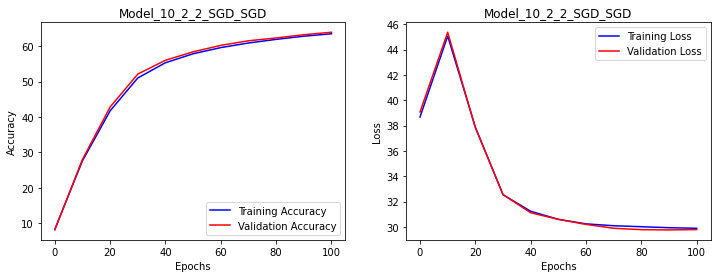

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Model_10_2_2_SGD_SGD")
plot_graph(Model_01[5],Model_01[6], "Accuracy")
plt.subplot(1,2,2)
plt.title("Model_10_2_2_SGD_SGD")
plot_graph(Model_01[7],Model_01[8], "Loss")
plt.show()

In [ ]:
Model_01 =( W1, b1, W2, b2, Activation, training_accuracy, validation_accuracy, training_loss, validation_loss)
Model_10_2_2_SGD_SGD = (W1, b1, W2, b2, Activation)
pickle.dump(Model_10_2_2_SGD_SGD, open('model_10_2_2_SGD_SGD.pkl', 'wb'))

In [ ]:
W1, b1, W2, b2, Activation, training_accuracy, validation_accuracy, training_loss, validation_loss = model(X_train, Y_train, X_test, Y_test, 10, 2,2, "SGD", "momentum", 0.1, 0.9, 0.9, 0.99, 100, 1.e-8)

Training model_ 10 2 2 SGD momentum
Epochs:  0
[4 9 2 ... 9 7 8] [4 2 9 ... 5 7 3]
1
Training_Accuracy: 8.306666666666667
Training_Loss: 38.681981631281396
[9 6 9 ... 6 9 3] [0 1 2 ... 8 8 1]
Validation_Accuracy: 8.16
Validation_Loss: 39.07535538692473
Epochs:  10
[4 2 9 ... 9 9 3] [4 2 9 ... 5 7 3]
2
Training_Accuracy: 27.644999999999996
Training_Loss: 45.07398393404565
[0 1 9 ... 1 0 3] [0 1 2 ... 8 8 1]
Validation_Accuracy: 28.050000000000004
Validation_Loss: 45.38206249588625
Epochs:  20
[4 2 9 ... 9 9 0] [4 2 9 ... 5 7 3]
3
Training_Accuracy: 41.754999999999995
Training_Loss: 37.874282444447445
[0 1 2 ... 3 2 4] [0 1 2 ... 8 8 1]
Validation_Accuracy: 42.82
Validation_Loss: 37.828014913818606
Epochs:  30
[4 2 9 ... 9 7 0] [4 2 9 ... 5 7 3]
4
Training_Accuracy: 51.02166666666667
Training_Loss: 32.540870443195914
[0 1 2 ... 8 2 4] [0 1 2 ... 8 8 1]
Validation_Accuracy: 52.11
Validation_Loss: 32.550874445233575
Epochs:  40
[4 2 9 ... 9 7 0] [4 2 9 ... 5 7 3]
5
Training_Accuracy: 55.31

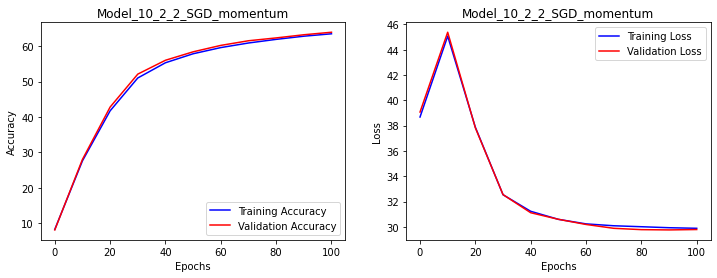

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Model_10_2_2_SGD_momentum")
plot_graph(training_accuracy,validation_accuracy, "Accuracy")
plt.subplot(1,2,2)
plt.title("Model_10_2_2_SGD_momentum")
plot_graph(training_loss, validation_loss, "Loss")
plt.show()

In [ ]:
Model_02 =( W1, b1, W2, b2, Activation, training_accuracy, validation_accuracy, training_loss, validation_loss)
Model_10_2_2_SGD_momentum = (W1, b1, W2, b2, Activation)
pickle.dump(Model_10_2_2_SGD_momentum, open('model_10_2_2_SGD_momentum.pkl', 'wb'))

In [ ]:
#W1, b1, W2, b2, training_accuracy, validation_accuracy, training_loss, validation_loss = model(X_train, Y_train, X_test, Y_test, 10, 2,2, "SGD", "NAG", 0.1, 0.9, 0.9, 0.99, 10, 1.e-8)

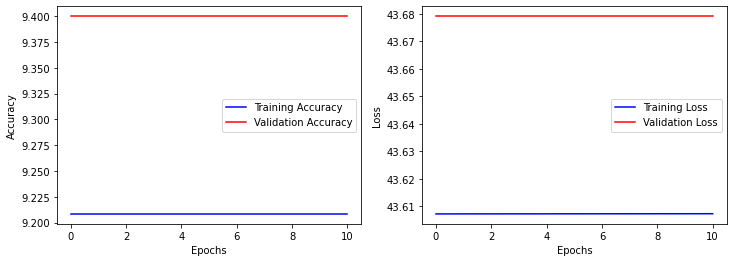

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plot_graph(training_accuracy,validation_accuracy, "Accuracy")
plt.subplot(1,2,2)
plot_graph(training_loss, validation_loss, "Loss")
plt.show()

In [ ]:
#Model_10_2_2_SGD_NAG = (W1, b1, W2, b2, training_accuracy, validation_accuracy, training_loss, validation_loss)
# pickle.dump(Model_10_2_2_SGD_NAG, open('model_10_2_2_SGD_NAG.pkl', 'wb'))

In [ ]:
W1, b1, W2, b2,Activation, training_accuracy, validation_accuracy, training_loss, validation_loss = model(X_train, Y_train, X_test, Y_test, 10, 2,2, "SGD", "adagrad", 0.1, 0.9, 0.9, 0.99, 100, 1.e-8)

Training model_ 10 2 2 SGD adagrad
Epochs:  0
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
1
Training_Accuracy: 82.90833333333333
Training_Loss: 26.977822974927225
[0 1 2 ... 8 6 2] [0 1 2 ... 8 8 1]
Validation_Accuracy: 82.63000000000001
Validation_Loss: 26.960520105316366
Epochs:  10
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
2
Training_Accuracy: 87.10833333333333
Training_Loss: 26.57943073115387
[0 1 2 ... 8 6 2] [0 1 2 ... 8 8 1]
Validation_Accuracy: 85.65
Validation_Loss: 26.7179480641058
Epochs:  20
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
3
Training_Accuracy: 87.68833333333333
Training_Loss: 26.67554127053763
[0 1 2 ... 8 6 1] [0 1 2 ... 8 8 1]
Validation_Accuracy: 86.07000000000001
Validation_Loss: 26.75596227355991
Epochs:  30
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
4
Training_Accuracy: 87.97833333333334
Training_Loss: 26.722596520191345
[0 1 2 ... 8 6 1] [0 1 2 ... 8 8 1]
Validation_Accuracy: 86.15
Validation_Loss: 26.932813078537006
Epochs:  40
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
5
Training_Accuracy

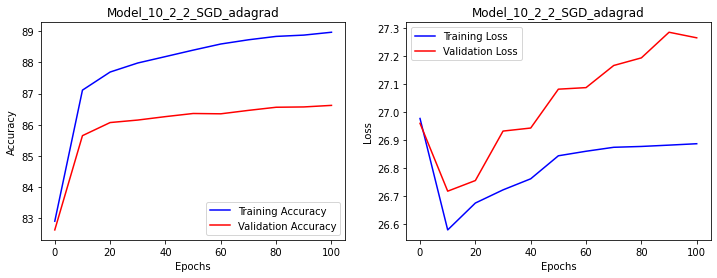

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Model_10_2_2_SGD_adagrad")
plot_graph(training_accuracy,validation_accuracy, "Accuracy")
plt.subplot(1,2,2)
plt.title("Model_10_2_2_SGD_adagrad")
plot_graph(training_loss, validation_loss, "Loss")
plt.show()

In [ ]:
Model_04=( W1, b1, W2, b2, Activation, training_accuracy, validation_accuracy, training_loss, validation_loss)
Model_10_2_2_SGD_adagrad = (W1, b1, W2, b2, Activation)
pickle.dump(Model_10_2_2_SGD_adagrad, open('model_10_2_2_SGD_adagradd.pkl', 'wb'))

In [ ]:
#W1, b1, W2, b2, training_accuracy, validation_accuracy, training_loss, validation_loss = model(X_train, Y_train, X_test, Y_test, 10, 2,2, "SGD", "RMSprop", 0.01, 0.9, 0.9, 0.99, 10, 1.e-8)

Training model_ 10 2 2 SGD RMSprop
Epochs:  0
[4 2 2 ... 2 2 4] [4 2 9 ... 5 7 3]
1
Training_Accuracy: 9.208333333333334
Training_Loss: 43.607201573591645
[2 6 9 ... 2 9 4] [0 1 2 ... 8 8 1]
Validation_Accuracy: 9.4
Validation_Loss: 43.6790851804295
Epochs:  10
[4 2 2 ... 2 2 4] [4 2 9 ... 5 7 3]
2
Training_Accuracy: 9.208333333333334
Training_Loss: 43.60727595477542
[2 6 9 ... 2 9 4] [0 1 2 ... 8 8 1]
Validation_Accuracy: 9.4
Validation_Loss: 43.6790851804295


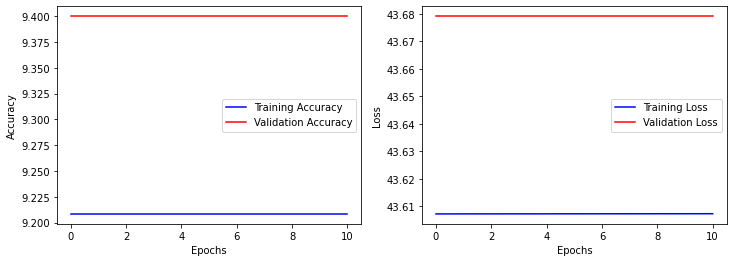

In [ ]:
# plt.figure(figsize=(12,4))
# plt.subplot(1,2,1)
# plot_graph(training_accuracy,validation_accuracy, "Accuracy")
# plt.subplot(1,2,2)
# plot_graph(training_loss, validation_loss, "Loss")
# plt.show()

In [ ]:
# Model_05 =( W1, b1, W2, b2, Activation, training_accuracy, validation_accuracy, training_loss, validation_loss)
# Model_10_2_2_SGD_RMSprop = (W1, b1, W2, b2, Activation)
# pickle.dump(Model_10_2_2_SGD_SGD, open('model_10_2_2_SGD_RMSprop.pkl', 'wb'))

In [ ]:
#W1, b1, W2, b2, training_accuracy, validation_accuracy, training_loss, validation_loss = model(X_train, Y_train, X_test, Y_test, 10, 2,2, "SGD", "adam", 0.01, 0.9, 0.9, 0.99, 10, 1.e-8)

Training model_ 10 2 2 SGD adam
Epochs:  0
[4 2 2 ... 2 2 4] [4 2 9 ... 5 7 3]
1
Training_Accuracy: 9.208333333333334
Training_Loss: 43.607201573591645
[2 6 9 ... 2 9 4] [0 1 2 ... 8 8 1]
Validation_Accuracy: 9.4
Validation_Loss: 43.6790851804295
Epochs:  10
[4 2 2 ... 2 2 4] [4 2 9 ... 5 7 3]
2
Training_Accuracy: 9.208333333333334
Training_Loss: 43.60727595477542
[2 6 9 ... 2 9 4] [0 1 2 ... 8 8 1]
Validation_Accuracy: 9.4
Validation_Loss: 43.6790851804295


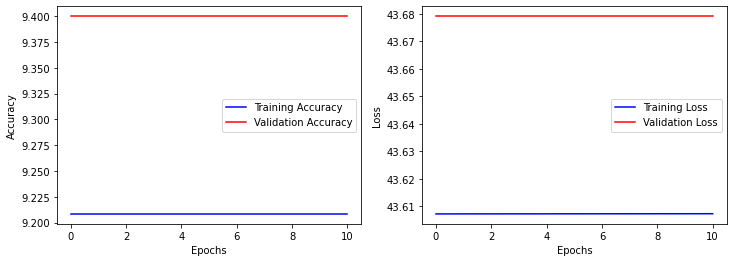

In [ ]:
# plt.figure(figsize=(12,4))
# plt.subplot(1,2,1)
# plot_graph(training_accuracy,validation_accuracy, "Accuracy")
# plt.subplot(1,2,2)
# plot_graph(training_loss, validation_loss, "Loss")
# plt.show()

In [ ]:
# Model_06 =( W1, b1, W2, b2, Activation, training_accuracy, validation_accuracy, training_loss, validation_loss)
# Model_10_2_2_SGD_adam = (W1, b1, W2, b2, Activation)
# pickle.dump(Model_10_2_2_SGD_SGD, open('model_10_2_2_SGD_adam.pkl', 'wb'))

In [ ]:
def plot_graph0(model1,model2,model4):
    x_value = [i*10 for i in range(len(model1))]
    plt.xlabel('Epochs')
    plt.plot(x_value,model1,color='b', label= "SGD_SGD")
    plt.plot(x_value,model2,color='g', label= "SGD_momentum")
    #plt.plot(x_value,model3,color='r', label= "GD_NAG")
    plt.plot(x_value,model4,color='c', label= "SGD_adagrad")
    #plt.plot(x_value,model5,color='m', label= "GD_RMSprop")
    #plt.plot(x_value,model6,color='y', label= "GD_adam")
    
    plt.legend()

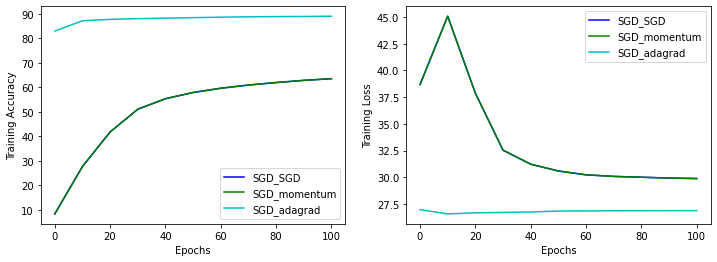

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.ylabel('Training Accuracy')
plot_graph0(Model_01[5],Model_02[5], Model_04[5])
plt.subplot(1,2,2)
plt.ylabel('Training Loss')
plot_graph0(Model_01[7],Model_02[7], Model_04[7])
plt.show()

In [ ]:
W1, b1, W2, b2, Activation, training_accuracy, validation_accuracy, training_loss, validation_loss = model(X_train, Y_train, X_test, Y_test, 10, 2,2, "GD", "GD", 0.1, 0.9, 0.9, 0.99, 1000, 1.e-8)

Training model_ 10 2 2 GD GD
Epochs:  0
[9 9 2 ... 9 7 8] [4 2 9 ... 5 7 3]
1
Training_Accuracy: 8.418333333333333
Training_Loss: 39.31296611434602
[9 6 9 ... 1 9 8] [0 1 2 ... 8 8 1]
Validation_Accuracy: 8.17
Validation_Loss: 39.07413743737179
Epochs:  10
[4 2 9 ... 9 9 3] [4 2 9 ... 5 7 3]
2
Training_Accuracy: 27.27
Training_Loss: 44.698780451105435
[9 1 9 ... 1 0 3] [0 1 2 ... 8 8 1]
Validation_Accuracy: 27.61
Validation_Loss: 44.8050981701774
Epochs:  20
[4 2 9 ... 9 9 0] [4 2 9 ... 5 7 3]
3
Training_Accuracy: 39.76
Training_Loss: 39.366384607103036
[0 1 0 ... 3 2 4] [0 1 2 ... 8 8 1]
Validation_Accuracy: 40.63
Validation_Loss: 39.2406994623873
Epochs:  30
[4 2 9 ... 9 9 0] [4 2 9 ... 5 7 3]
4
Training_Accuracy: 50.28666666666667
Training_Loss: 32.761719477885734
[0 1 2 ... 8 2 4] [0 1 2 ... 8 8 1]
Validation_Accuracy: 51.33
Validation_Loss: 32.70595240553824
Epochs:  40
[4 2 9 ... 9 7 0] [4 2 9 ... 5 7 3]
5
Training_Accuracy: 54.86666666666666
Training_Loss: 31.28548180229781
[0 1

Training_Accuracy: 71.30499999999999
Training_Loss: 26.603079191052608
[0 1 2 ... 8 6 4] [0 1 2 ... 8 8 1]
Validation_Accuracy: 71.1
Validation_Loss: 26.464507660360724
Epochs:  380
[4 2 9 ... 7 7 3] [4 2 9 ... 5 7 3]
39
Training_Accuracy: 71.54
Training_Loss: 26.57603829614826
[0 1 2 ... 8 6 4] [0 1 2 ... 8 8 1]
Validation_Accuracy: 71.37
Validation_Loss: 26.430344405995704
Epochs:  390
[4 2 9 ... 7 7 3] [4 2 9 ... 5 7 3]
40
Training_Accuracy: 71.76333333333334
Training_Loss: 26.550314564135096
[0 1 2 ... 8 6 4] [0 1 2 ... 8 8 1]
Validation_Accuracy: 71.56
Validation_Loss: 26.405201442908833
Epochs:  400
[4 2 9 ... 7 7 3] [4 2 9 ... 5 7 3]
41
Training_Accuracy: 71.92666666666668
Training_Loss: 26.55602808542939
[0 1 2 ... 8 6 4] [0 1 2 ... 8 8 1]
Validation_Accuracy: 71.74000000000001
Validation_Loss: 26.367990640855677
Epochs:  410
[4 2 9 ... 7 7 3] [4 2 9 ... 5 7 3]
42
Training_Accuracy: 72.135
Training_Loss: 26.52895711079928
[0 1 2 ... 8 6 4] [0 1 2 ... 8 8 1]
Validation_Accuracy:

Epochs:  750
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
76
Training_Accuracy: 76.71166666666667
Training_Loss: 26.84807853698677
[6 1 6 ... 8 6 2] [0 1 2 ... 8 8 1]
Validation_Accuracy: 76.72
Validation_Loss: 26.79755612642829
Epochs:  760
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
77
Training_Accuracy: 76.81833333333333
Training_Loss: 26.837843657670447
[6 1 6 ... 8 6 2] [0 1 2 ... 8 8 1]
Validation_Accuracy: 76.8
Validation_Loss: 26.780376383892946
Epochs:  770
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
78
Training_Accuracy: 76.88333333333334
Training_Loss: 26.8367389907737
[6 1 6 ... 8 6 2] [0 1 2 ... 8 8 1]
Validation_Accuracy: 76.81
Validation_Loss: 26.780767545418954
Epochs:  780
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
79
Training_Accuracy: 76.97666666666667
Training_Loss: 26.8360778899467
[6 1 6 ... 8 6 2] [0 1 2 ... 8 8 1]
Validation_Accuracy: 76.84
Validation_Loss: 26.771801122305483
Epochs:  790
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
80
Training_Accuracy: 77.05333333333333
Training_Loss: 26.828981466365

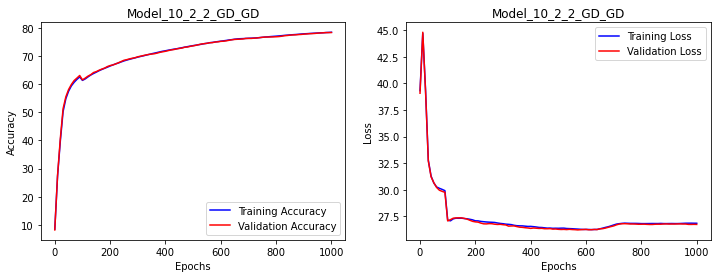

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Model_10_2_2_GD_GD")
plot_graph(training_accuracy,validation_accuracy, "Accuracy")
plt.subplot(1,2,2)
plt.title("Model_10_2_2_GD_GD")
plot_graph(training_loss, validation_loss, "Loss")
plt.show()



In [ ]:
Model_1= ( W1, b1, W2, b2, Activation, training_accuracy, validation_accuracy, training_loss, validation_loss)
Model_10_2_2_GD_GD = (W1, b1, W2, b2, Activation)
pickle.dump(Model_10_2_2_GD_GD, open('model_10_2_2_GD_GD.pkl', 'wb'))


In [ ]:
print((Model_1[4]))

2


In [ ]:
W1, b1, W2, b2, Activation, training_accuracy, validation_accuracy, training_loss, validation_loss = model(X_train, Y_train, X_test, Y_test, 10, 2,2, "GD", "momentum", 0.1, 0.9, 0.9, 0.99, 1000, 1.e-8)

Training model_ 10 2 2 GD momentum
Epochs:  0
[4 2 2 ... 2 2 4] [4 2 9 ... 5 7 3]
1
Training_Accuracy: 8.863333333333333
Training_Loss: 42.51200732232322
[2 6 9 ... 9 9 4] [0 1 2 ... 8 8 1]
Validation_Accuracy: 9.04
Validation_Loss: 42.78829703573255
Epochs:  10
[0 9 9 ... 9 9 3] [4 2 9 ... 5 7 3]
2
Training_Accuracy: 17.19
Training_Loss: 48.58591200488894
[9 6 9 ... 1 0 3] [0 1 2 ... 8 8 1]
Validation_Accuracy: 17.9
Validation_Loss: 48.680973959455834
Epochs:  20
[2 2 9 ... 9 9 3] [4 2 9 ... 5 7 3]
3
Training_Accuracy: 27.358333333333334
Training_Loss: 46.76568022402233
[2 1 9 ... 9 2 3] [0 1 2 ... 8 8 1]
Validation_Accuracy: 28.21
Validation_Loss: 46.21498288295049
Epochs:  30
[2 2 9 ... 9 9 3] [4 2 9 ... 5 7 3]
4
Training_Accuracy: 30.64
Training_Loss: 44.66007361537609
[2 1 9 ... 0 2 3] [0 1 2 ... 8 8 1]
Validation_Accuracy: 30.91
Validation_Loss: 44.315493722186375
Epochs:  40
[2 2 9 ... 9 9 3] [4 2 9 ... 5 7 3]
5
Training_Accuracy: 42.66833333333334
Training_Loss: 37.611373646629

[4 2 9 ... 7 7 3] [4 2 9 ... 5 7 3]
38
Training_Accuracy: 71.55333333333334
Training_Loss: 29.55850494569299
[0 1 2 ... 8 6 4] [0 1 2 ... 8 8 1]
Validation_Accuracy: 71.33
Validation_Loss: 29.388670580455134
Epochs:  380
[4 2 9 ... 7 7 3] [4 2 9 ... 5 7 3]
39
Training_Accuracy: 71.72333333333333
Training_Loss: 29.539257211237658
[0 1 2 ... 8 6 4] [0 1 2 ... 8 8 1]
Validation_Accuracy: 71.46000000000001
Validation_Loss: 29.385678047190705
Epochs:  390
[4 2 9 ... 7 7 3] [4 2 9 ... 5 7 3]
40
Training_Accuracy: 71.89166666666667
Training_Loss: 29.5102270491227
[0 1 2 ... 8 6 2] [0 1 2 ... 8 8 1]
Validation_Accuracy: 71.7
Validation_Loss: 29.32283897406532
Epochs:  400
[4 2 9 ... 7 7 3] [4 2 9 ... 5 7 3]
41
Training_Accuracy: 72.05333333333334
Training_Loss: 29.502370499422963
[0 1 2 ... 8 6 2] [0 1 2 ... 8 8 1]
Validation_Accuracy: 71.8
Validation_Loss: 29.3202437159439
Epochs:  410
[4 2 9 ... 7 7 3] [4 2 9 ... 5 7 3]
42
Training_Accuracy: 72.235
Training_Loss: 29.477635751973764
[0 1 2 ..

Epochs:  740
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
75
Training_Accuracy: 76.79333333333334
Training_Loss: 28.622577594390787
[0 1 2 ... 8 6 2] [0 1 2 ... 8 8 1]
Validation_Accuracy: 77.02
Validation_Loss: 28.465847289230688
Epochs:  750
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
76
Training_Accuracy: 76.90666666666667
Training_Loss: 28.598282507928868
[0 1 2 ... 8 6 2] [0 1 2 ... 8 8 1]
Validation_Accuracy: 77.14
Validation_Loss: 28.465086842258415
Epochs:  760
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
77
Training_Accuracy: 77.01
Training_Loss: 28.577845649802097
[0 1 2 ... 8 6 2] [0 1 2 ... 8 8 1]
Validation_Accuracy: 77.31
Validation_Loss: 28.464007894870914
Epochs:  770
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
78
Training_Accuracy: 77.10666666666667
Training_Loss: 28.561120154636104
[0 1 2 ... 8 6 2] [0 1 2 ... 8 8 1]
Validation_Accuracy: 77.42
Validation_Loss: 28.440164536479152
Epochs:  780
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
79
Training_Accuracy: 77.21833333333333
Training_Loss: 28.54283902372434
[0

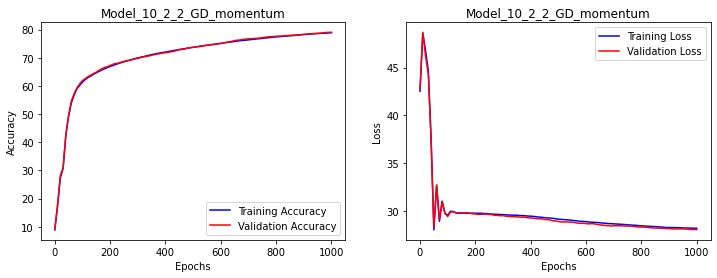

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Model_10_2_2_GD_momentum")
plot_graph(training_accuracy,validation_accuracy, "Accuracy")
plt.subplot(1,2,2)
plt.title("Model_10_2_2_GD_momentum")
plot_graph(training_loss, validation_loss, "Loss")
plt.show()

In [ ]:
Model_2 = (W1, b1, W2, b2, Activation, training_accuracy, validation_accuracy, training_loss, validation_loss)
Model_10_2_2_GD_momentum = (W1, b1, W2, b2, Activation)
pickle.dump(Model_10_2_2_GD_momentum, open('model_10_2_2_GD_momentum.pkl', 'wb'))

In [ ]:
print((Model_2[4]))

2


In [ ]:
W1, b1, W2, b2, Activation, training_accuracy, validation_accuracy, training_loss, validation_loss = model(X_train, Y_train, X_test, Y_test, 10, 2,2, "GD", "NAG", 0.1, 0.9, 0.9, 0.99, 1000, 1.e-8)

Training model_ 10 2 2 GD NAG
Epochs:  0
[4 2 2 ... 2 2 4] [4 2 9 ... 5 7 3]
1
Training_Accuracy: 8.863333333333333
Training_Loss: 42.51200732232322
[2 6 9 ... 9 9 4] [0 1 2 ... 8 8 1]
Validation_Accuracy: 9.04
Validation_Loss: 42.78829703573255
Epochs:  10
[0 9 9 ... 9 9 6] [4 2 9 ... 5 7 3]
2
Training_Accuracy: 16.273333333333333
Training_Loss: 49.77676022157447
[9 6 9 ... 0 0 1] [0 1 2 ... 8 8 1]
Validation_Accuracy: 16.89
Validation_Loss: 49.433212645918154
Epochs:  20
[9 9 9 ... 9 9 1] [4 2 9 ... 5 7 3]
3
Training_Accuracy: 21.925
Training_Loss: 32.57672601918104
[9 3 9 ... 9 2 9] [0 1 2 ... 8 8 1]
Validation_Accuracy: 22.35
Validation_Loss: 33.145346644802245
Epochs:  30
[9 9 9 ... 9 9 1] [4 2 9 ... 5 7 3]
4
Training_Accuracy: 21.92
Training_Loss: 31.676211087927076
[9 1 9 ... 9 2 9] [0 1 2 ... 8 8 1]
Validation_Accuracy: 22.5
Validation_Loss: 32.123086708277896
Epochs:  40
[9 9 9 ... 9 9 1] [4 2 9 ... 5 7 3]
5
Training_Accuracy: 22.735
Training_Loss: 37.57446270218266
[9 1 9 ...

Epochs:  380
[4 2 9 ... 7 7 3] [4 2 9 ... 5 7 3]
39
Training_Accuracy: 69.82333333333334
Training_Loss: 30.025917530551144
[0 1 2 ... 8 6 4] [0 1 2 ... 8 8 1]
Validation_Accuracy: 69.88
Validation_Loss: 29.98542749699166
Epochs:  390
[4 2 9 ... 7 7 3] [4 2 9 ... 5 7 3]
40
Training_Accuracy: 70.06833333333333
Training_Loss: 30.001288770618515
[0 1 2 ... 8 6 4] [0 1 2 ... 8 8 1]
Validation_Accuracy: 70.24000000000001
Validation_Loss: 29.92810894326506
Epochs:  400
[4 2 9 ... 7 7 3] [4 2 9 ... 5 7 3]
41
Training_Accuracy: 70.25333333333333
Training_Loss: 29.99876940658428
[0 1 2 ... 8 6 4] [0 1 2 ... 8 8 1]
Validation_Accuracy: 70.42
Validation_Loss: 29.943982665913715
Epochs:  410
[4 2 9 ... 7 7 3] [4 2 9 ... 5 7 3]
42
Training_Accuracy: 70.44500000000001
Training_Loss: 29.999932552787516
[0 1 2 ... 8 6 4] [0 1 2 ... 8 8 1]
Validation_Accuracy: 70.54
Validation_Loss: 29.981535517754683
Epochs:  420
[4 2 9 ... 7 7 3] [4 2 9 ... 5 7 3]
43
Training_Accuracy: 70.66
Training_Loss: 29.98337595

[0 1 2 ... 8 6 6] [0 1 2 ... 8 8 1]
Validation_Accuracy: 74.58
Validation_Loss: 29.99250273247795
Epochs:  760
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
77
Training_Accuracy: 74.70166666666667
Training_Loss: 29.991490030879742
[0 1 2 ... 8 6 6] [0 1 2 ... 8 8 1]
Validation_Accuracy: 74.68
Validation_Loss: 29.995871244929123
Epochs:  770
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
78
Training_Accuracy: 74.77333333333334
Training_Loss: 29.989626813991215
[0 1 2 ... 8 6 6] [0 1 2 ... 8 8 1]
Validation_Accuracy: 74.72
Validation_Loss: 30.002535970210957
Epochs:  780
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
79
Training_Accuracy: 74.84333333333333
Training_Loss: 29.995203615986803
[0 1 2 ... 8 6 6] [0 1 2 ... 8 8 1]
Validation_Accuracy: 74.82
Validation_Loss: 29.973964882133373
Epochs:  790
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
80
Training_Accuracy: 74.9
Training_Loss: 29.98989456808173
[0 1 2 ... 8 6 6] [0 1 2 ... 8 8 1]
Validation_Accuracy: 74.81
Validation_Loss: 29.958624157993153
Epochs:  800
[4 2 9 ... 5 7 

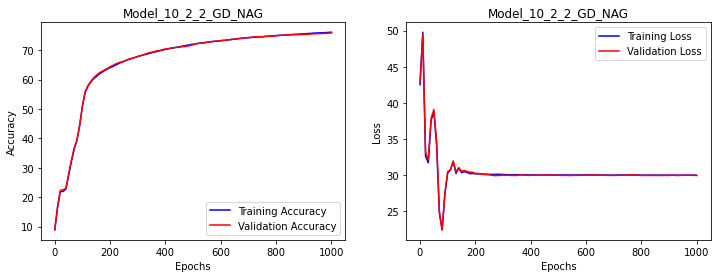

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Model_10_2_2_GD_NAG")
plot_graph(training_accuracy,validation_accuracy, "Accuracy")
plt.subplot(1,2,2)
plt.title("Model_10_2_2_GD_NAG")
plot_graph(training_loss, validation_loss, "Loss")
plt.show()

In [ ]:
Model_3 = (W1, b1, W2, b2, Activation, training_accuracy, validation_accuracy, training_loss, validation_loss)
Model_10_2_2_GD_NAG = (W1, b1, W2, b2, Activation)
pickle.dump(Model_10_2_2_GD_NAG, open('model_10_2_2_GD_NAG.pkl', 'wb'))

In [ ]:
print(Model_3[4])

2


In [ ]:
W1, b1, W2, b2,Activation, training_accuracy, validation_accuracy, training_loss, validation_loss = model(X_train, Y_train, X_test, Y_test, 10, 2,2, "GD", "adagrad", 0.1, 0.9, 0.9, 0.99, 1000, 1.e-8)

Training model_ 10 2 2 GD adagrad
Epochs:  0
[6 6 6 ... 6 6 6] [4 2 9 ... 5 7 3]
1
Training_Accuracy: 10.24
Training_Loss: 19.837688918107883
[6 6 6 ... 6 6 6] [0 1 2 ... 8 8 1]
Validation_Accuracy: 10.280000000000001
Validation_Loss: 19.86393563133623
Epochs:  10
[9 9 9 ... 9 3 1] [4 2 9 ... 5 7 3]
2
Training_Accuracy: 31.063333333333333
Training_Loss: 36.75851050678644
[9 1 9 ... 1 9 9] [0 1 2 ... 8 8 1]
Validation_Accuracy: 31.56
Validation_Loss: 36.66124351761748
Epochs:  20
[1 9 9 ... 7 7 1] [4 2 9 ... 5 7 3]
3
Training_Accuracy: 39.891666666666666
Training_Loss: 39.50516191673136
[0 1 9 ... 1 9 9] [0 1 2 ... 8 8 1]
Validation_Accuracy: 39.900000000000006
Validation_Loss: 39.68212200203378
Epochs:  30
[1 0 9 ... 7 7 1] [4 2 9 ... 5 7 3]
4
Training_Accuracy: 48.016666666666666
Training_Loss: 31.88376164506223
[0 1 9 ... 8 1 9] [0 1 2 ... 8 8 1]
Validation_Accuracy: 48.19
Validation_Loss: 31.948862622364178
Epochs:  40
[8 0 7 ... 5 7 1] [4 2 9 ... 5 7 3]
5
Training_Accuracy: 49.2133

Epochs:  370
[6 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
38
Training_Accuracy: 74.35666666666667
Training_Loss: 29.02775885411113
[0 1 2 ... 8 8 6] [0 1 2 ... 8 8 1]
Validation_Accuracy: 74.2
Validation_Loss: 29.1968373554088
Epochs:  380
[6 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
39
Training_Accuracy: 74.80333333333333
Training_Loss: 28.73838551955365
[0 1 2 ... 8 8 2] [0 1 2 ... 8 8 1]
Validation_Accuracy: 74.53
Validation_Loss: 28.91799857660572
Epochs:  390
[6 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
40
Training_Accuracy: 75.08166666666666
Training_Loss: 28.55950175519516
[0 1 2 ... 8 8 2] [0 1 2 ... 8 8 1]
Validation_Accuracy: 74.98
Validation_Loss: 28.723958298763204
Epochs:  400
[6 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
41
Training_Accuracy: 75.27666666666667
Training_Loss: 28.49813990419216
[0 1 2 ... 8 8 2] [0 1 2 ... 8 8 1]
Validation_Accuracy: 75.28
Validation_Loss: 28.62912441508409
Epochs:  410
[6 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
42
Training_Accuracy: 75.50333333333333
Training_Loss: 28.51195033356099

Epochs:  750
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
76
Training_Accuracy: 78.3
Training_Loss: 27.773242134645088
[0 1 2 ... 8 8 2] [0 1 2 ... 8 8 1]
Validation_Accuracy: 78.4
Validation_Loss: 27.802083832693476
Epochs:  760
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
77
Training_Accuracy: 78.32166666666667
Training_Loss: 27.777494331956675
[0 1 2 ... 8 8 2] [0 1 2 ... 8 8 1]
Validation_Accuracy: 78.41
Validation_Loss: 27.801295214844234
Epochs:  770
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
78
Training_Accuracy: 78.35833333333333
Training_Loss: 27.763725574962855
[0 1 2 ... 8 8 2] [0 1 2 ... 8 8 1]
Validation_Accuracy: 78.42
Validation_Loss: 27.802419365018444
Epochs:  780
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
79
Training_Accuracy: 78.39833333333334
Training_Loss: 27.761432676183865
[0 1 2 ... 8 8 2] [0 1 2 ... 8 8 1]
Validation_Accuracy: 78.49000000000001
Validation_Loss: 27.799098178868626
Epochs:  790
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
80
Training_Accuracy: 78.43666666666667
Training_Loss: 27.7543968

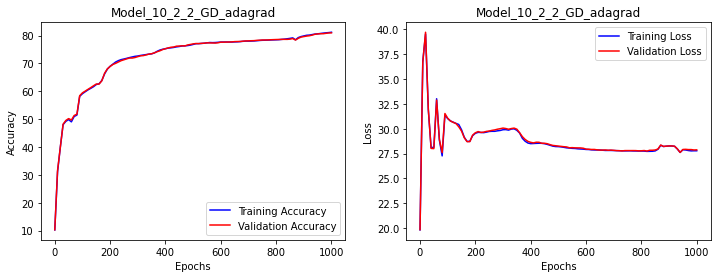

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_graph(training_accuracy,validation_accuracy, "Accuracy")
plt.title("Model_10_2_2_GD_adagrad")
plt.subplot(1,2,2)
plt.title("Model_10_2_2_GD_adagrad")
plot_graph(training_loss, validation_loss, "Loss")
plt.show()

In [ ]:
Model_4 = (W1, b1, W2, b2, Activation, training_accuracy, validation_accuracy, training_loss, validation_loss)
Model_10_2_2_GD_adagrad = (W1, b1, W2, b2, Activation)
pickle.dump(Model_10_2_2_GD_adagrad, open('model_10_2_2_GD_adagrad.pkl', 'wb'))

In [ ]:
print((Model_4[4]))

2


In [ ]:
W1, b1, W2, b2, Activation, training_accuracy, validation_accuracy, training_loss, validation_loss = model(X_train, Y_train, X_test, Y_test, 10, 2,2, "GD", "RMSprop", 0.01, 0.9, 0.9, 0.99, 1000, 1.e-8)

Training model_ 10 2 2 GD RMSprop
Epochs:  0
[6 6 6 ... 6 6 6] [4 2 9 ... 5 7 3]
1
Training_Accuracy: 9.978333333333333
Training_Loss: 28.89910194423605
[6 6 6 ... 6 6 6] [0 1 2 ... 8 8 1]
Validation_Accuracy: 9.959999999999999
Validation_Loss: 28.848215643569887
Epochs:  10
[9 0 5 ... 9 9 1] [4 2 9 ... 5 7 3]
2
Training_Accuracy: 31.71
Training_Loss: 39.04261256082373
[0 1 9 ... 1 0 9] [0 1 2 ... 8 8 1]
Validation_Accuracy: 32.25
Validation_Loss: 39.177413841345995
Epochs:  20
[8 9 9 ... 5 9 3] [4 2 9 ... 5 7 3]
3
Training_Accuracy: 47.74666666666666
Training_Loss: 26.51887388255762
[0 1 9 ... 8 4 1] [0 1 2 ... 8 8 1]
Validation_Accuracy: 48.06
Validation_Loss: 26.519813627682236
Epochs:  30
[8 0 9 ... 5 7 3] [4 2 9 ... 5 7 3]
4
Training_Accuracy: 59.278333333333336
Training_Loss: 37.060281696742564
[0 1 0 ... 8 6 6] [0 1 2 ... 8 8 1]
Validation_Accuracy: 58.93000000000001
Validation_Loss: 37.043464986076714
Epochs:  40
[4 2 5 ... 5 5 3] [4 2 9 ... 5 7 3]
5
Training_Accuracy: 68.63666

Epochs:  370
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
38
Training_Accuracy: 81.31333333333333
Training_Loss: 30.9723300962913
[0 1 2 ... 8 8 1] [0 1 2 ... 8 8 1]
Validation_Accuracy: 81.11
Validation_Loss: 30.998808234027564
Epochs:  380
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
39
Training_Accuracy: 82.79166666666666
Training_Loss: 27.305131910640995
[6 1 2 ... 8 8 2] [0 1 2 ... 8 8 1]
Validation_Accuracy: 82.39
Validation_Loss: 27.313517147219653
Epochs:  390
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
40
Training_Accuracy: 81.78666666666666
Training_Loss: 26.494332174961304
[6 1 2 ... 8 8 0] [0 1 2 ... 8 8 1]
Validation_Accuracy: 82.05
Validation_Loss: 26.50405530790482
Epochs:  400
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
41
Training_Accuracy: 82.18333333333334
Training_Loss: 25.191212025563054
[6 1 2 ... 8 8 3] [0 1 2 ... 8 8 1]
Validation_Accuracy: 82.21000000000001
Validation_Loss: 25.223134269025216
Epochs:  410
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
42
Training_Accuracy: 83.435
Training_Loss: 29.5546136

Training_Accuracy: 85.23833333333334
Training_Loss: 26.197744503291272
[6 1 2 ... 8 6 0] [0 1 2 ... 8 8 1]
Validation_Accuracy: 84.73
Validation_Loss: 26.358808705750164
Epochs:  750
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
76
Training_Accuracy: 82.795
Training_Loss: 29.450747339192713
[0 1 2 ... 8 8 0] [0 1 2 ... 8 8 1]
Validation_Accuracy: 82.24000000000001
Validation_Loss: 29.345567014056513
Epochs:  760
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
77
Training_Accuracy: 82.53
Training_Loss: 27.300293604818908
[0 1 2 ... 8 6 0] [0 1 2 ... 8 8 1]
Validation_Accuracy: 82.23
Validation_Loss: 27.37193955543261
Epochs:  770
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
78
Training_Accuracy: 84.85666666666667
Training_Loss: 26.533571535162736
[6 1 2 ... 8 8 6] [0 1 2 ... 8 8 1]
Validation_Accuracy: 84.33
Validation_Loss: 26.481361098972027
Epochs:  780
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
79
Training_Accuracy: 85.35000000000001
Training_Loss: 27.261407285295526
[6 1 2 ... 8 8 2] [0 1 2 ... 8 8 1]
Validation_Accura

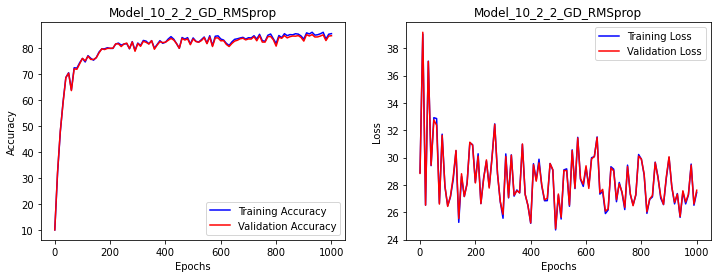

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Model_10_2_2_GD_RMSprop")
plot_graph(training_accuracy,validation_accuracy, "Accuracy")
plt.subplot(1,2,2)
plt.title("Model_10_2_2_GD_RMSprop")
plot_graph(training_loss, validation_loss, "Loss")
plt.show()

In [ ]:
Model_5 = (W1, b1, W2, b2, Activation, training_accuracy, validation_accuracy, training_loss, validation_loss)
Model_10_2_2_GD_RMSprop = (W1, b1, W2, b2, Activation)
pickle.dump(Model_10_2_2_GD_RMSprop, open('model_10_2_2_GD_RMSprop.pkl', 'wb'))

In [ ]:
print(Model_5[4])

2


In [ ]:
W1, b1, W2, b2, Activation, training_accuracy, validation_accuracy, training_loss, validation_loss = model(X_train, Y_train, X_test, Y_test, 10, 2,2, "GD", "adam", 0.01, 0.9, 0.9, 0.99, 1000, 1.e-8)

Training model_ 10 2 2 GD adam
Epochs:  0
[6 9 1 ... 9 1 6] [4 2 9 ... 5 7 3]
1
Training_Accuracy: 8.411666666666667
Training_Loss: 38.07802465100046
[9 6 0 ... 6 6 6] [0 1 2 ... 8 8 1]
Validation_Accuracy: 8.21
Validation_Loss: 38.69236721460979
Epochs:  10
[9 0 2 ... 9 9 1] [4 2 9 ... 5 7 3]
2
Training_Accuracy: 29.94333333333333
Training_Loss: 48.035826305609945
[0 1 9 ... 9 0 0] [0 1 2 ... 8 8 1]
Validation_Accuracy: 30.490000000000002
Validation_Loss: 47.94742161408632
Epochs:  20
[2 0 2 ... 9 2 3] [4 2 9 ... 5 7 3]
3
Training_Accuracy: 34.836666666666666
Training_Loss: 54.98983451858264
[0 1 0 ... 9 2 0] [0 1 2 ... 8 8 1]
Validation_Accuracy: 35.18
Validation_Loss: 55.13373440483556
Epochs:  30
[4 0 5 ... 5 7 3] [4 2 9 ... 5 7 3]
4
Training_Accuracy: 59.365
Training_Loss: 31.123786574106806
[0 1 2 ... 8 4 6] [0 1 2 ... 8 8 1]
Validation_Accuracy: 59.86
Validation_Loss: 31.128112834895454
Epochs:  40
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
5
Training_Accuracy: 69.72166666666666
Traini

Epochs:  370
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
38
Training_Accuracy: 86.33666666666666
Training_Loss: 27.381506685052358
[0 1 2 ... 8 6 6] [0 1 2 ... 8 8 1]
Validation_Accuracy: 84.91
Validation_Loss: 27.396033582768343
Epochs:  380
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
39
Training_Accuracy: 86.42666666666666
Training_Loss: 27.341163863090152
[0 1 2 ... 8 6 6] [0 1 2 ... 8 8 1]
Validation_Accuracy: 84.95
Validation_Loss: 27.32617417621001
Epochs:  390
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
40
Training_Accuracy: 86.46833333333333
Training_Loss: 27.395337381708835
[0 1 2 ... 8 6 6] [0 1 2 ... 8 8 1]
Validation_Accuracy: 84.98
Validation_Loss: 27.393656965070832
Epochs:  400
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
41
Training_Accuracy: 86.54333333333334
Training_Loss: 27.44557707825985
[0 1 2 ... 8 6 6] [0 1 2 ... 8 8 1]
Validation_Accuracy: 84.99
Validation_Loss: 27.460267013970164
Epochs:  410
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
42
Training_Accuracy: 86.50166666666667
Training_Loss: 27.1505049

Epochs:  750
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
76
Training_Accuracy: 87.40166666666667
Training_Loss: 27.456661514586933
[0 1 2 ... 8 6 6] [0 1 2 ... 8 8 1]
Validation_Accuracy: 85.2
Validation_Loss: 27.674399472878914
Epochs:  760
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
77
Training_Accuracy: 87.39333333333333
Training_Loss: 27.481640661487326
[0 1 2 ... 8 6 2] [0 1 2 ... 8 8 1]
Validation_Accuracy: 85.17
Validation_Loss: 27.76735402141533
Epochs:  770
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
78
Training_Accuracy: 87.40333333333334
Training_Loss: 27.37112420011263
[0 1 2 ... 8 6 6] [0 1 2 ... 8 8 1]
Validation_Accuracy: 85.13
Validation_Loss: 27.607978875814865
Epochs:  780
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
79
Training_Accuracy: 87.42166666666667
Training_Loss: 27.32422271110983
[0 1 2 ... 8 6 6] [0 1 2 ... 8 8 1]
Validation_Accuracy: 85.16
Validation_Loss: 27.57529858594068
Epochs:  790
[4 2 9 ... 5 7 3] [4 2 9 ... 5 7 3]
80
Training_Accuracy: 87.33999999999999
Training_Loss: 27.4401566489

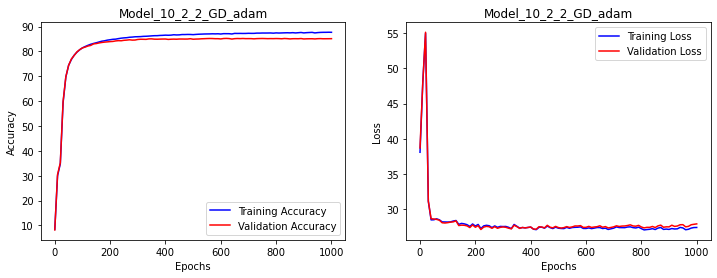

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Model_10_2_2_GD_adam")
plot_graph(training_accuracy,validation_accuracy, "Accuracy")
plt.subplot(1,2,2)
plt.title("Model_10_2_2_GD_adam")
plot_graph(training_loss, validation_loss, "Loss")
plt.show()

In [ ]:
Model_6 = (W1, b1, W2, b2, Activation, training_accuracy, validation_accuracy, training_loss, validation_loss)
Model_10_2_2_GD_adam = (W1, b1, W2, b2, Activation)
pickle.dump(Model_10_2_2_GD_adam, open('model_10_2_2_GD_adam.pkl', 'wb'))

In [ ]:
print(Model_6[4])

2


In [ ]:
def plot_graph1(model1,model2,model3,model4,model5,model6):
    x_value = [i*10 for i in range(len(model1))]
    plt.xlabel('Epochs')
    plt.plot(x_value,model1,color='b', label= "GD_GD")
    plt.plot(x_value,model2,color='g', label= "GD_momentum")
    plt.plot(x_value,model3,color='r', label= "GD_NAG")
    plt.plot(x_value,model4,color='c', label= "GD_adagrad")
    plt.plot(x_value,model5,color='m', label= "GD_RMSprop")
    plt.plot(x_value,model6,color='y', label= "GD_adam")
    
    plt.legend()

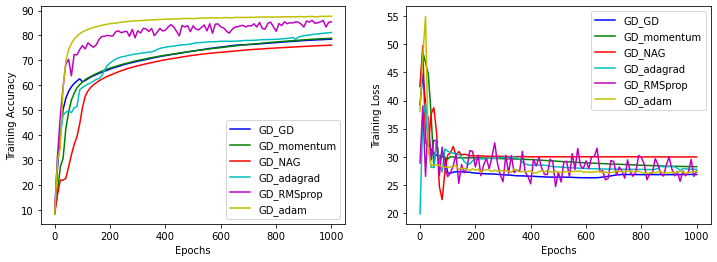

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.ylabel('Training Accuracy')
plot_graph1(Model_1[5],Model_2[5], Model_3[5], Model_4[5], Model_5[5], Model_6[5])
plt.subplot(1,2,2)
plt.ylabel('Training Loss')
plot_graph1(Model_1[7],Model_2[7], Model_3[7], Model_4[7], Model_5[7], Model_6[7])
plt.show()

In [ ]:
def loadModel(modelFile):
    pickled_model = pickle.load(open(modelFile, 'rb'))
    return pickled_model

In [ ]:
def getAccuracy(modelFile, Xtest, Ytest):
    (W1, b1, W2, b2, Activation) = loadModel(modelFile)
    model_predictions = make_predictions(Xtest, W1, b1, W2, b2,Activation)
    model_accuracy = get_accuracy(model_predictions, Ytest)*100
    return model_accuracy

In [ ]:
modelFile = "model_10_2_2_GD_GD.pkl"
print("Model accuracy on ", modelFile," = ",getAccuracy(modelFile, X_test, Y_test))
modelFile = "model_10_2_2_GD_NAG.pkl"
print("Model accuracy on ", modelFile," = ",getAccuracy(modelFile, X_test, Y_test))
modelFile = "model_10_2_2_GD_momentum.pkl"
print("Model accuracy on ", modelFile," = ",getAccuracy(modelFile, X_test, Y_test))
modelFile = "model_10_2_2_GD_RMSprop.pkl"
print("Model accuracy on ", modelFile," = ",getAccuracy(modelFile, X_test, Y_test))
modelFile = "model_10_2_2_GD_adagrad.pkl"
print("Model accuracy on ", modelFile," = ",getAccuracy(modelFile, X_test, Y_test))
modelFile = "model_10_2_2_GD_adam.pkl"
print("Model accuracy on ", modelFile," = ",getAccuracy(modelFile, X_test, Y_test))

[6 1 6 ... 8 6 2] [0 1 2 ... 8 8 1]
Model accuracy on  model_10_2_2_GD_GD.pkl  =  78.42
[0 1 2 ... 8 6 2] [0 1 2 ... 8 8 1]
Model accuracy on  model_10_2_2_GD_NAG.pkl  =  75.88000000000001
[0 1 2 ... 8 6 2] [0 1 2 ... 8 8 1]
Model accuracy on  model_10_2_2_GD_momentum.pkl  =  79.08
[0 1 2 ... 8 6 0] [0 1 2 ... 8 8 1]
Model accuracy on  model_10_2_2_GD_RMSprop.pkl  =  84.7
[0 1 2 ... 8 6 2] [0 1 2 ... 8 8 1]
Model accuracy on  model_10_2_2_GD_adagrad.pkl  =  80.96
[0 1 2 ... 8 6 6] [0 1 2 ... 8 8 1]
Model accuracy on  model_10_2_2_GD_adam.pkl  =  85.13


## The 5 optimizers have been implemented from scratch
- We have tried demonstrating their performance with both GD and SGD.
- With SGD the performance was much slower due to the large dataset, hence we have demonstrated for 2 optimizers for 100 epochs.
- With GD, we've shown performance for all 5 optimizers over 1000 epochs.
- The accuracy and loss plots have been generated with GD and have been shown above.
- A comparitive plot has also been shown for accuracy and loss for all optimizers for 1000 epochs.

## Performance comparison
- We find that in terms of decreasing accuracy, the plots can ordered as: Adam > RMSprop > ADAgrad > Momentum > GD (Vanilla) > NAG
- The performance gains from optimizers is mostly as expected apart from NAG which may require some additional tuning.